In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

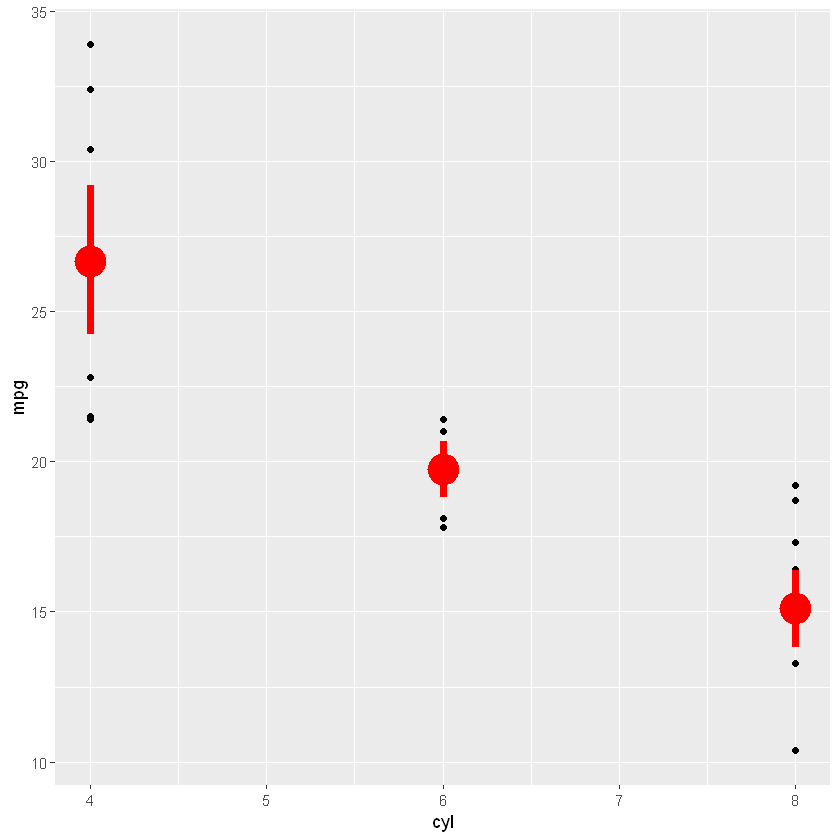

In [3]:
d <- ggplot(mtcars, aes(cyl, mpg)) +
       geom_point()

d +
  stat_summary(fun.data = "mean_cl_boot", colour = "red",
               size = 2)

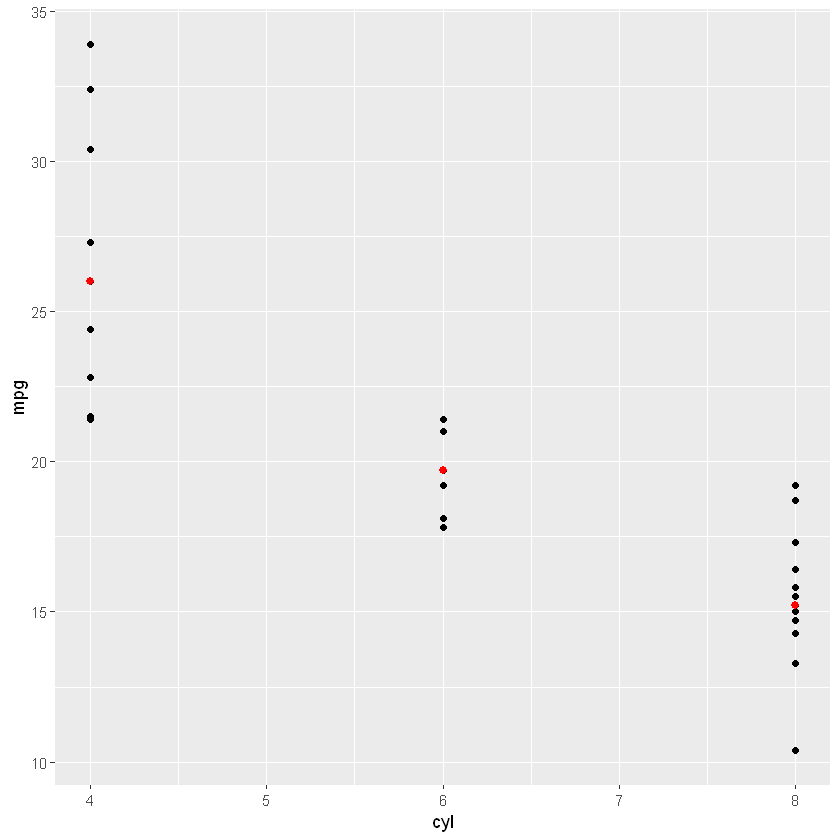

In [4]:
# You can supply individual functions to summarize the
# value at each x:

d +
  stat_summary(fun.y = "median", colour = "red", size = 2,
               geom = "point")

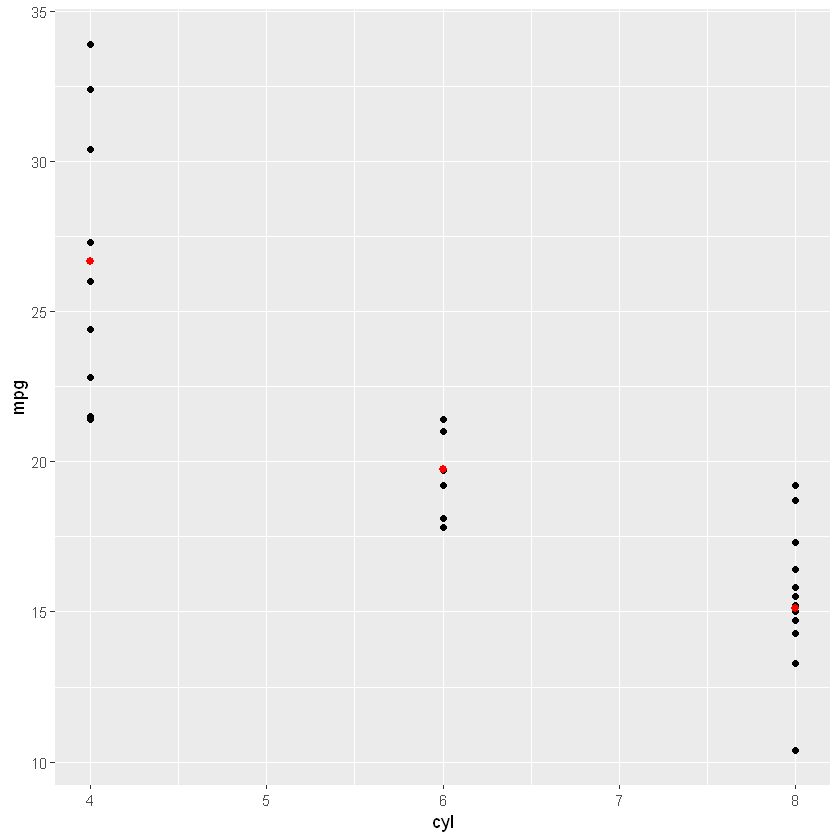

In [5]:
d +
  stat_summary(fun.y = "mean", colour = "red", size = 2,
               geom = "point")

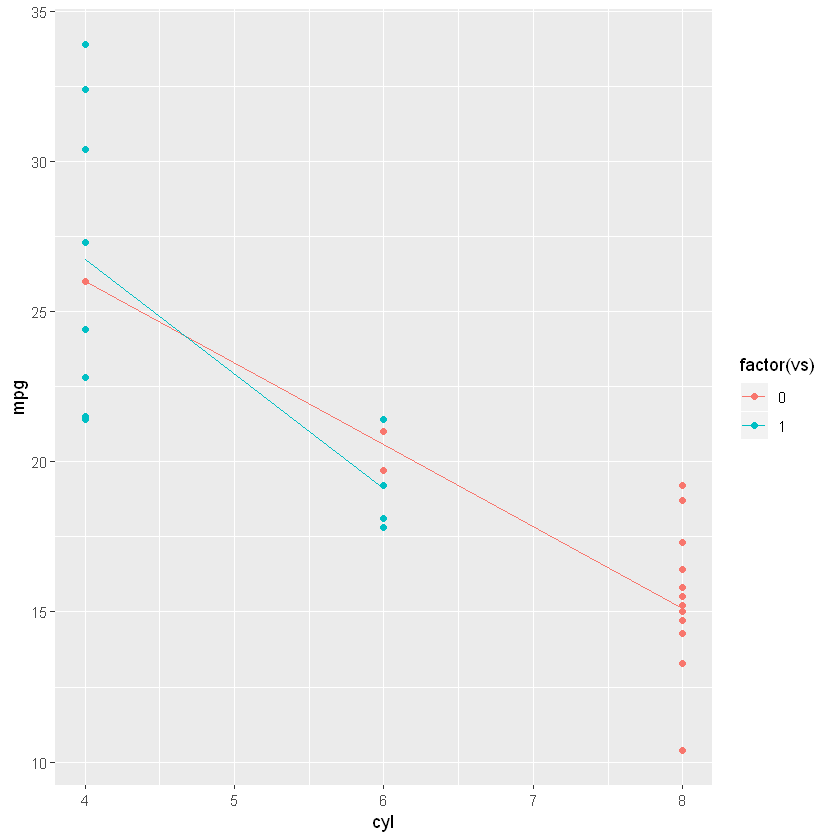

In [6]:
d +
  aes(colour = factor(vs)) +
  stat_summary(fun.y = mean, geom = "line")

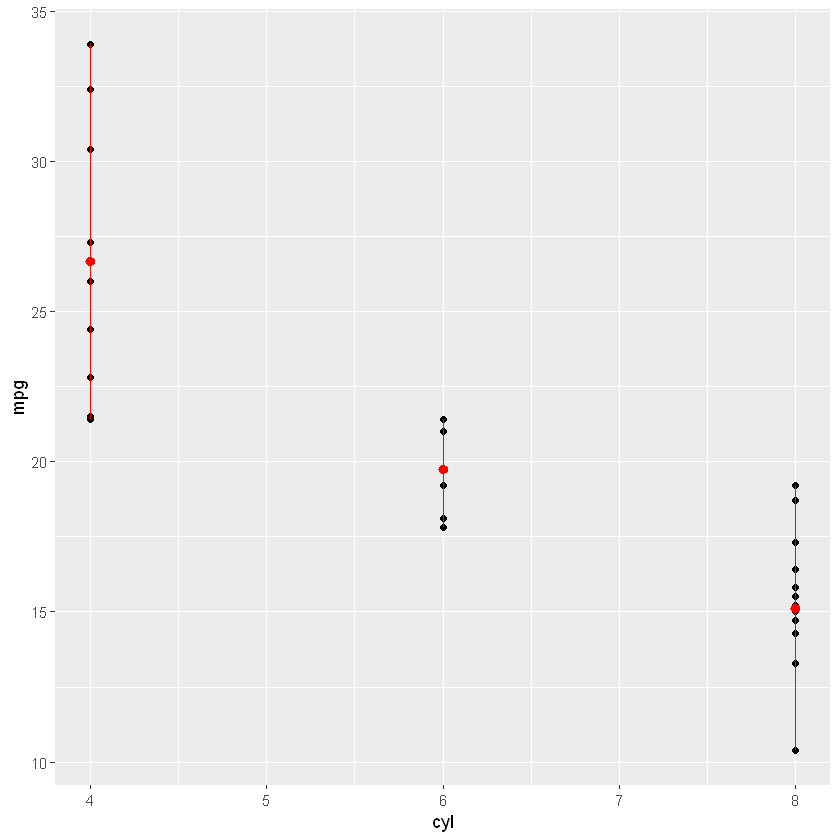

In [7]:
d +
  stat_summary(fun.y = mean, fun.ymin = min, fun.ymax = max,
               colour = "red")

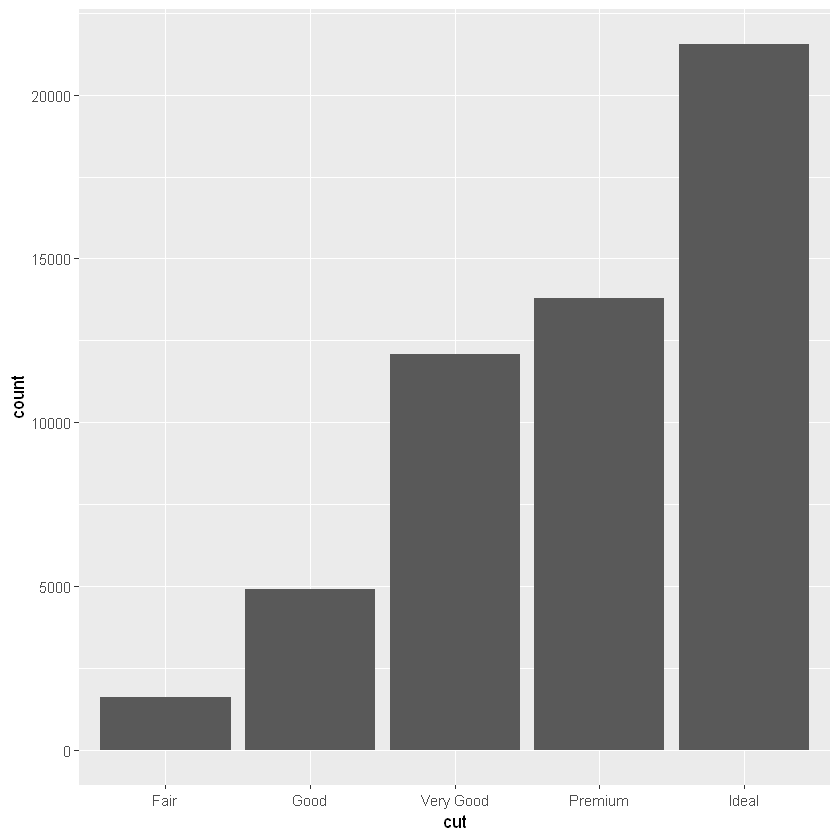

In [8]:
d <- ggplot(diamonds, aes(cut))
d +
  geom_bar()

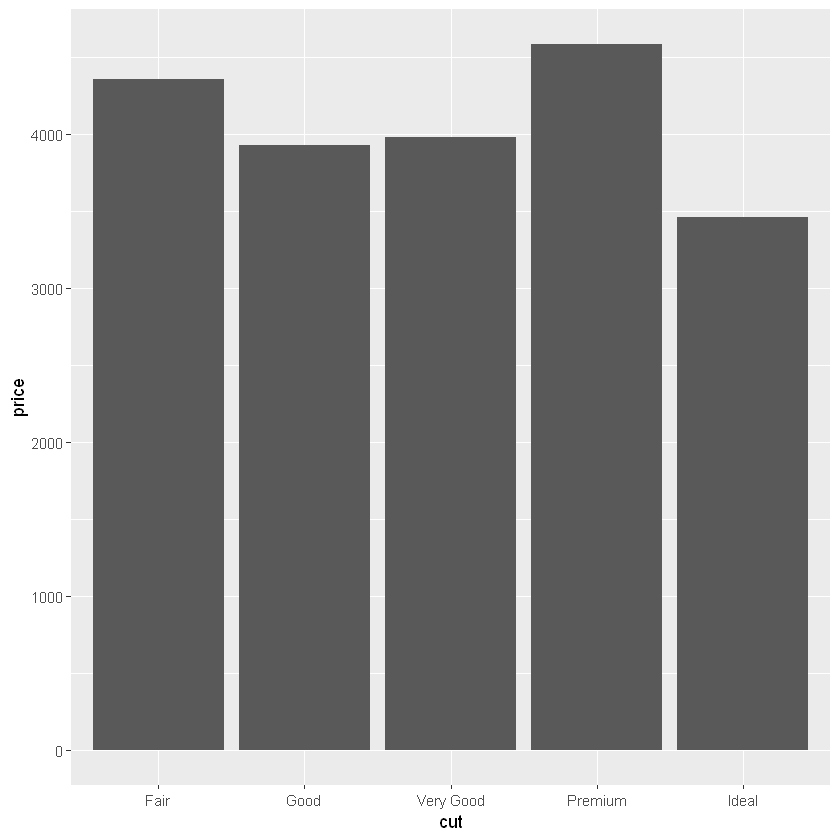

In [9]:
d +
  stat_summary_bin(aes(y = price), fun.y = "mean",
                   geom = "bar")

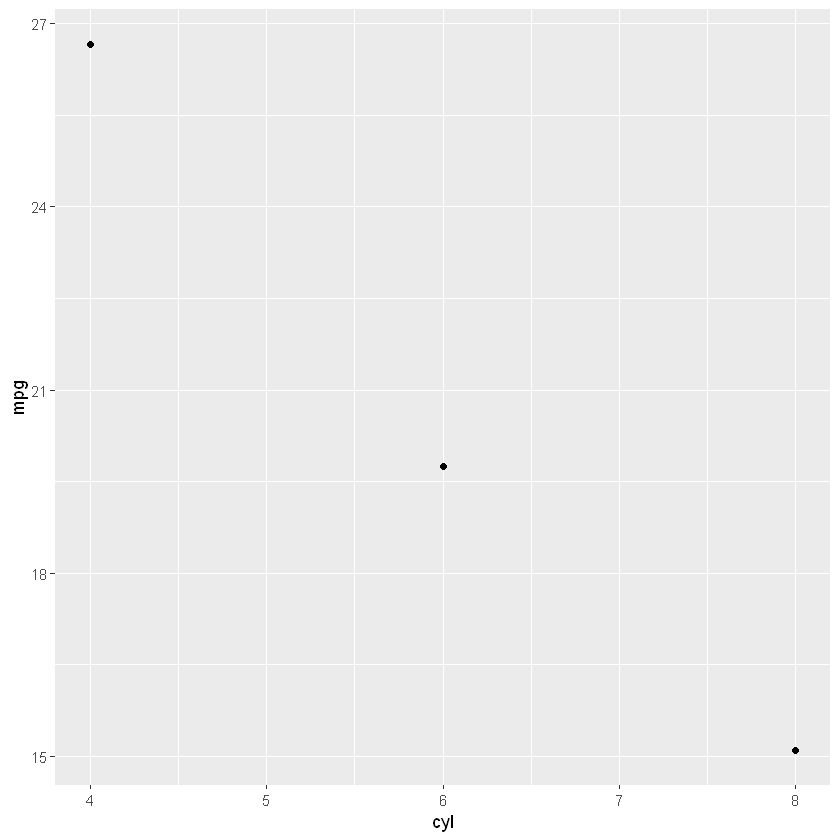

In [10]:
# Don't use ylim to zoom into a summary plot - this throws
# the data away

p <- ggplot(mtcars, aes(cyl, mpg)) +
  stat_summary(fun.y = "mean", geom = "point")
p

Warning message:
"Removed 9 rows containing non-finite values (stat_summary)."

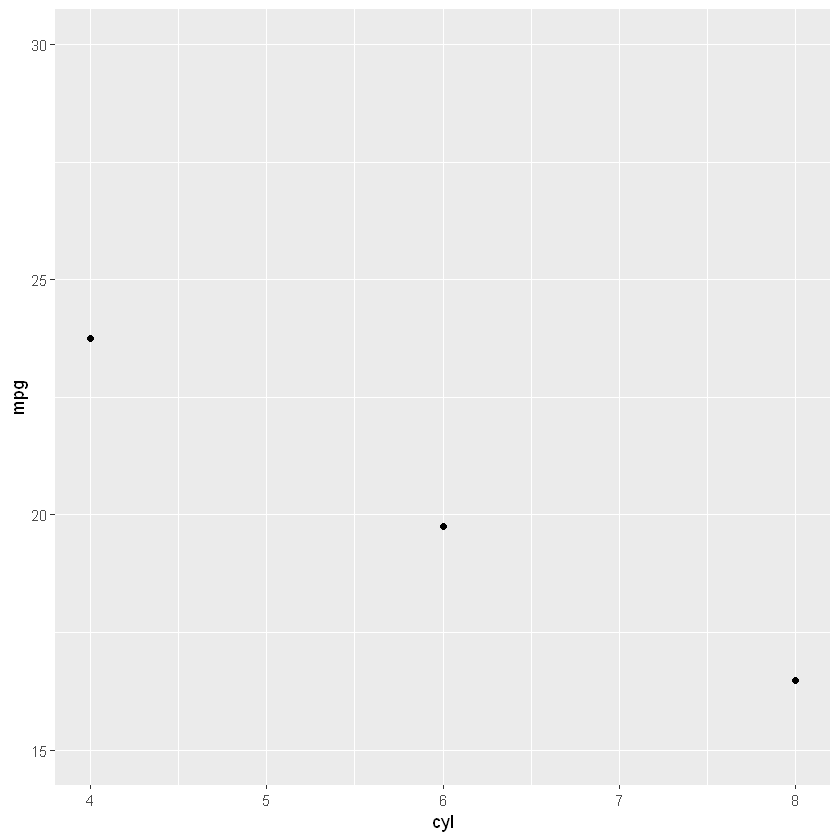

In [11]:
p +
  ylim(15, 30)

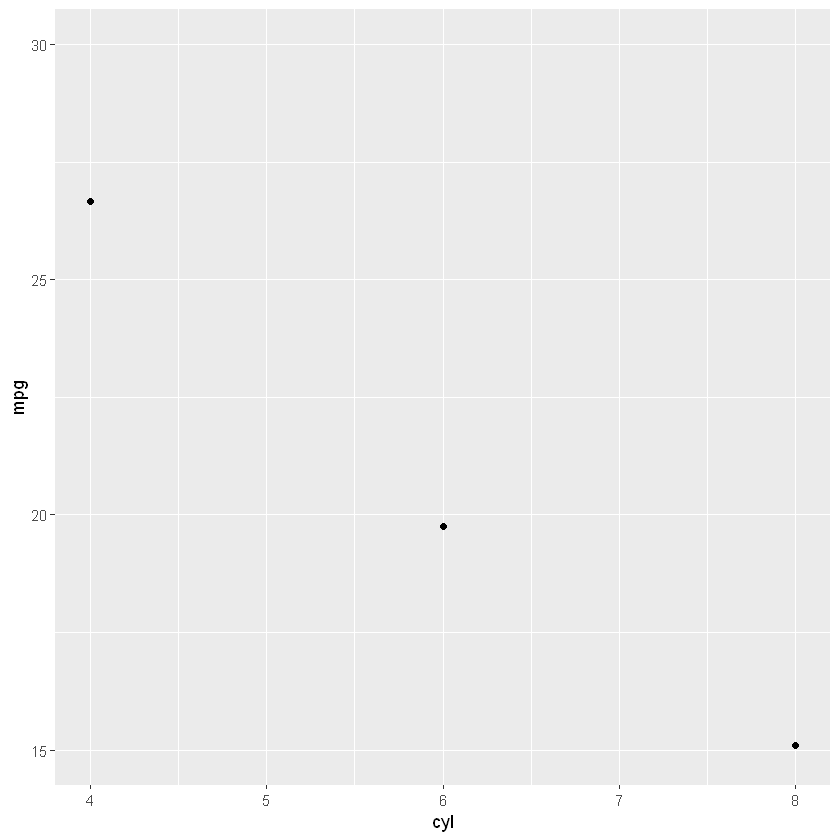

In [12]:
# Instead, use coord_cartesian()

p +
  coord_cartesian(ylim = c(15, 30))

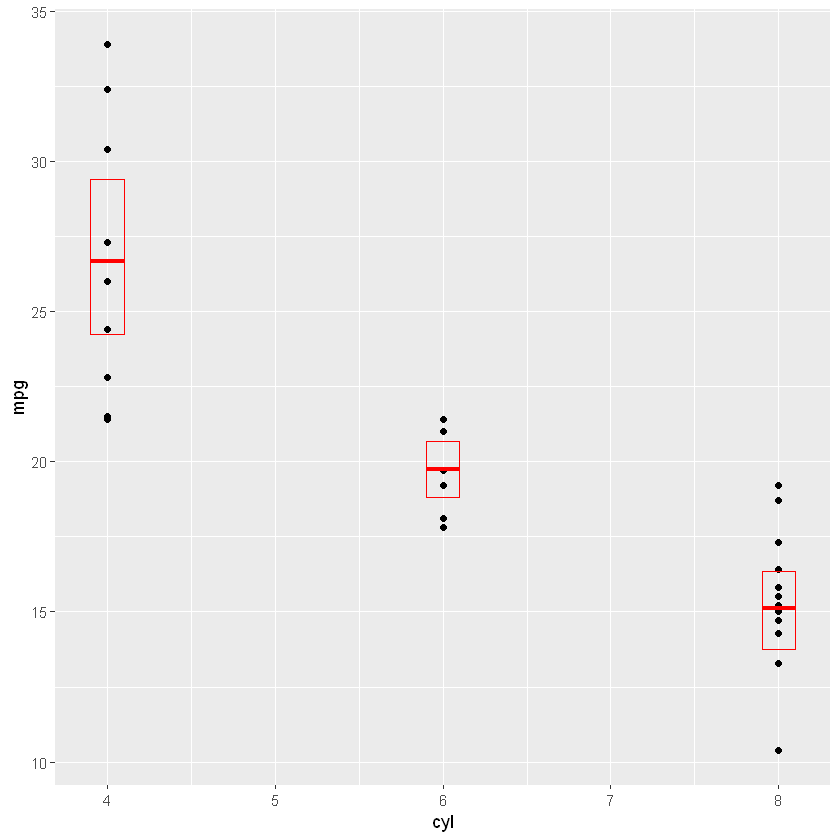

In [13]:
# A set of useful summary functions is provided from the
# Hmisc package:

stat_sum_df <- function(fun, geom = "crossbar", ...) {
    stat_summary(fun.data = fun, colour = "red", geom = geom,
                 width = 0.2, ...)
}

d <- ggplot(mtcars, aes(cyl, mpg)) +
       geom_point()

# The crossbar geom needs grouping to be specified when used
# with a continuous x axis.

d +
  stat_sum_df("mean_cl_boot", mapping = aes(group = cyl))

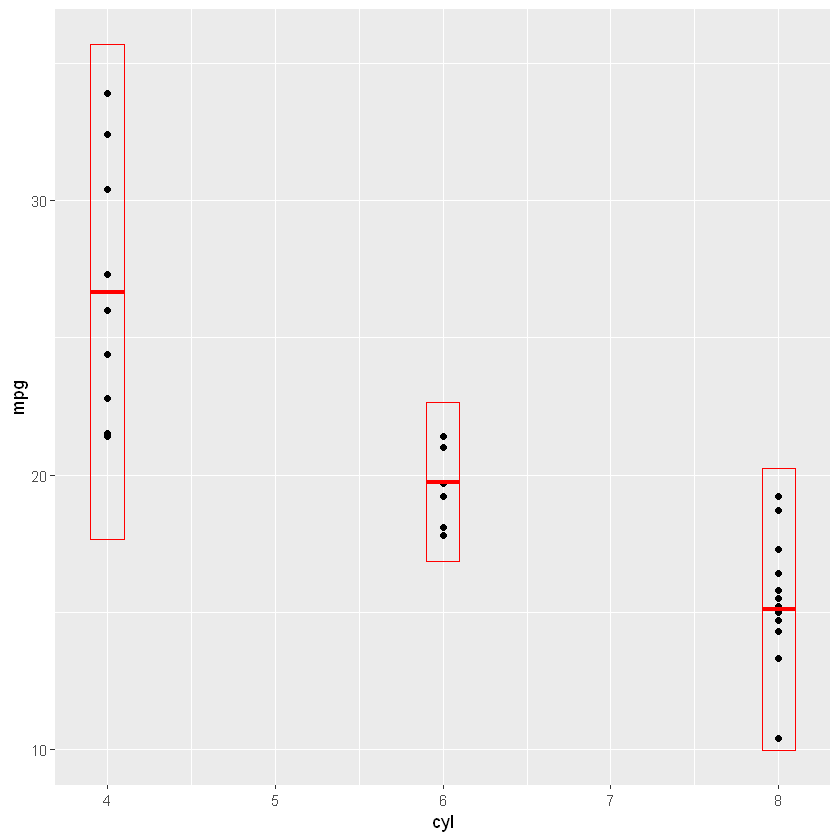

In [14]:
d +
  stat_sum_df("mean_sdl", mapping = aes(group = cyl))

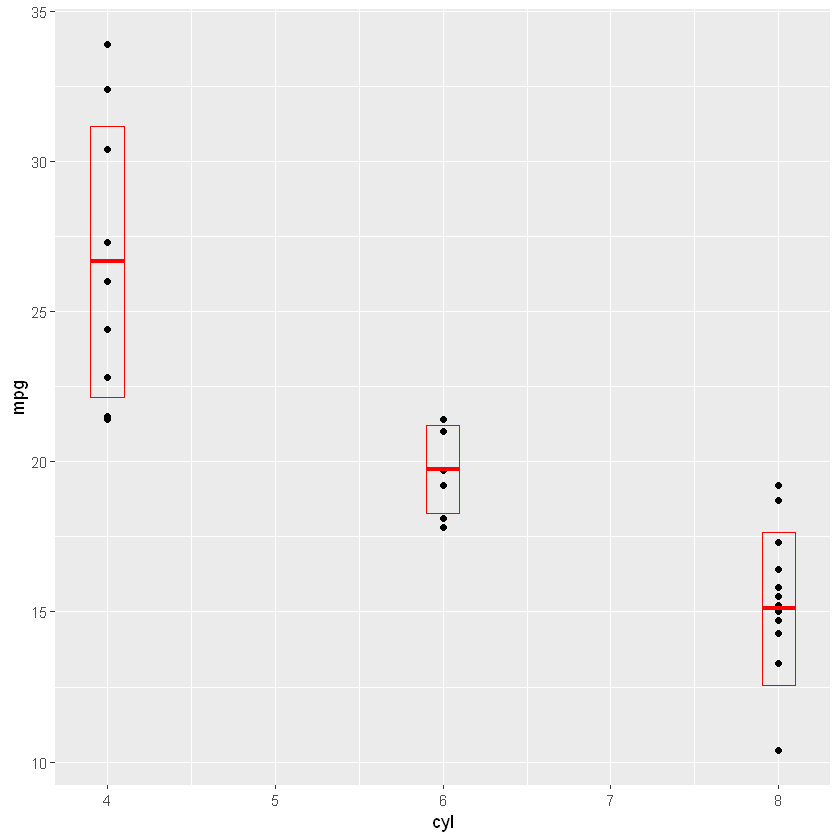

In [15]:
d +
  stat_sum_df("mean_sdl", fun.args = list(mult = 1),
              mapping = aes(group = cyl))

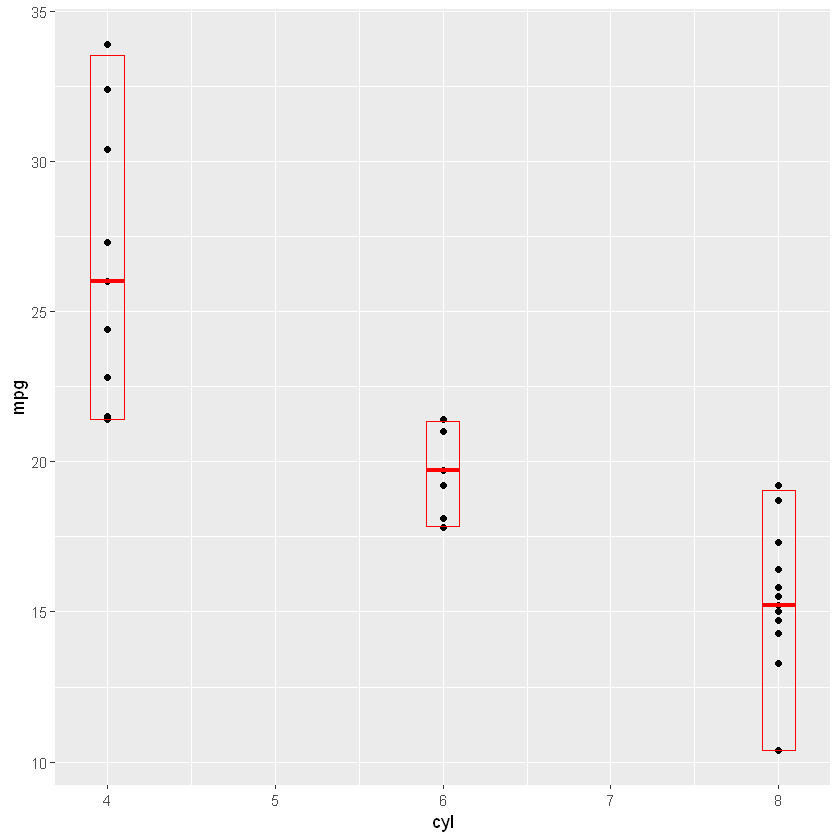

In [16]:
d +
  stat_sum_df("median_hilow", mapping = aes(group = cyl))

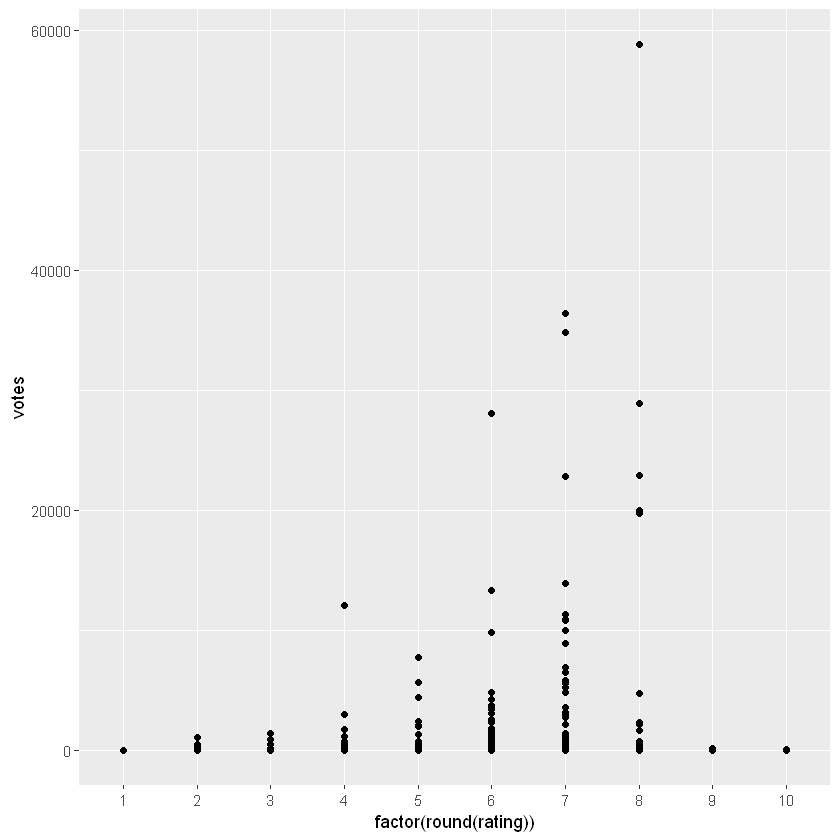

In [18]:
# An example with highly skewed distributions:

if(require("ggplot2movies")) {
    set.seed(596)
    mov <- movies[sample(nrow(movies), 1000), ]
    m2 <- ggplot(mov, aes(x = factor(round(rating)), 
                          y = votes)) + geom_point()
    m2
}

Warning message:
"Removed 1 rows containing missing values (geom_crossbar)."Warning message:
"Removed 1 rows containing missing values (geom_crossbar)."

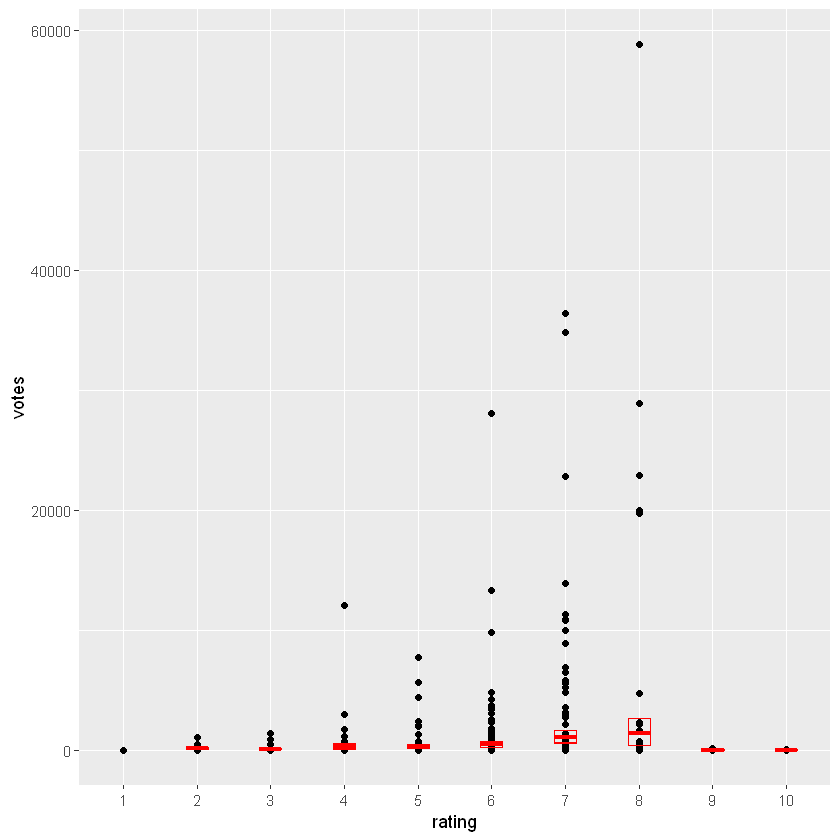

In [20]:
m2 <- m2 +
            stat_summary(fun.data = "mean_cl_boot",
                         geom = "crossbar", colour = "red",
                         width = 0.3) +
            xlab("rating")
m2
    
#     Notice how the overplotting skews off visual
#     perception of the mean 
#     Supplementing the raw data with summary statistics 
#     is _very_ important

#     Next, we'll look at votes on a log scale

Warning message:
"Removed 1 rows containing missing values (geom_crossbar)."Warning message:
"Removed 1 rows containing missing values (geom_crossbar)."

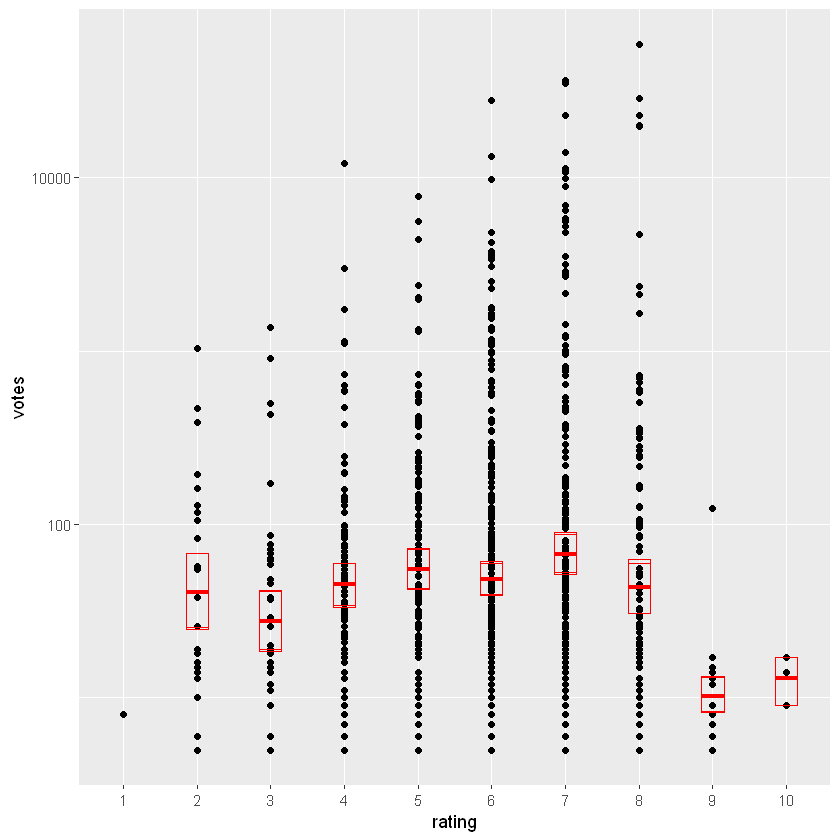

In [21]:
# Transforming the scale means the data are transformed
# first, after which statistics are computed:

m2 +
  scale_y_log10()

Warning message:
"Removed 1 rows containing missing values (geom_crossbar)."Warning message:
"Removed 1 rows containing missing values (geom_crossbar)."

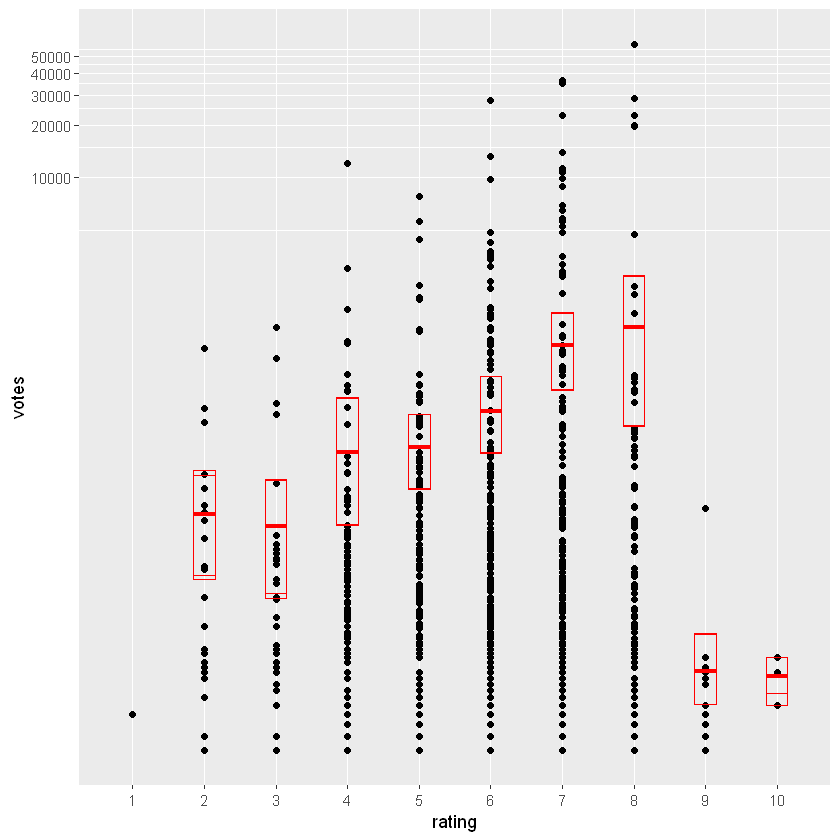

In [22]:
# Transforming the coordinate system occurs after the
# statistic has been computed. This means we're calculating
# the summary on the raw data and stretching the geoms onto
# the log scale. Compare the widths of the standard errors.

m2 + 
  coord_trans(y = "log10")